In [ ]:
##Logistic regression 예

##시험공부 시간을 기준으로 한 Pass, Fail
## 0.5보다 크면 합격
##데이터에 따라(ex.바이너리 레이블(결과 데이터가 0과1로 빠지는)) linear로 학습했을 경우 학습되지 않을 수 있다 ->logistic regression 으로 학습시켜야함.


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings

### vector형태의데이터 보다 배열형태의 데이터를 더 많이씁니다.


warnings.filterwarnings(action="ignore")   
##training data set
x_data = [1,2,5,8,10,30]                  #동떨어진 data(30.1) 넣으면 학습 안되고 발산해버림
y_data = [0,0,0,1,1,1]


#placeholder
x =tf.placeholder(dtype=tf.float32)             ##shape는 2차원배열일때 무조건 잡아줘야하나 1차원 벡터인경우 굳이 placeholder잡을 필요x
y =tf.placeholder(dtype=tf.float32)


#Weight & bias   #2개의 tensorflow variable을 제시해줘야한다.  #처음의 초기 w값과 b값은 랜덤으로 잡힌다 따라서 답이 다르게 나온다
W= tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

#Hypothesis
H=W*x+b

#cost function
cost=tf.reduce_mean(tf.square(H-y))                  #요놈은 2차함수. 미분을 통해 해당 2차함수의 최소값을 찾으러 갈 것임.

#train node생성                                     ##cost함수를 최소화하는 알고리즘  //#learning_rate:는 내가 잡으려고 하는w가 얼마나 줄어드느냐
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#Session. & 초기화
sess= tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(30000):
    _, cost_val = sess.run([train,cost], feed_dict={x:x_data, y:y_data})
    if step %3000==0:
        print(cost_val)

#prediction :::::::::: 6시간 공부했을 때 예측값은? 0.533 
print(sess.run(H, feed_dict={x:[6]}))



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
170.75587
nan
nan
nan
nan
nan
nan
nan
nan
nan
[nan]


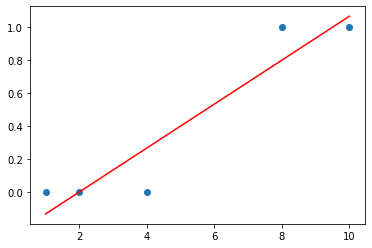

In [18]:
#plot
plt.scatter(x_data,y_data)    ##x_data/ y_data가지고 산점도?그려봐
plt.plot(x_data,x_data * sess.run(W) + sess.run(b),"r")   ##node를 실행시켜야 해당 tensor의 값을 알수 있음. W , b
plt.show()

In [ ]:
##Cost function(Logistic regression)  ::::::::::::: Hypothesis와 cost함수가 바뀐다.


#H(x)=1/1+e^-(xw+b)
#함수 개형은 w 모양(울퉁불퉁) - 진짜 real 최소값을 못 찻을 수도 있다.

#따라서 local minimum을 해결하기 위해 log를 이용
#cost(H(x),y)= -y log(H(x))-(1-y)log(1-h(x))

In [67]:
import tensorflow as tf

#training data set (Matrix형태 ) 
x_data=[
       [10,0],
       [8,1],
       [3,3],
       [2,3],
       [5,1],
       [2,0],
       [1,0]]
y_data=[[1],[1],[1],[1],[0],[0],[0]]




#placeholder
X=tf.placeholder(shape=[None,2], dtype=tf.float32)
Y=tf.placeholder(shape=[None,1], dtype=tf.float32)

#Weight&bias
W=tf.Variable(tf.random_normal([2,1]), name="weight")
b=tf.Variable(tf.random_normal([1]), name="bias")


#Hypothesis
logits = tf.matmul(X,W)+b
H=tf.sigmoid(logits)
# 지수 함수 형태의 H 정의

#cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y)) ##cost함수 Logistic function 변수 2개.

#training node생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#Session. & 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
    if step % 300 ==0:
        print(cost_val)
        
#Accuracy
#가지고 있는 학습데이터 셋을 7:3 의 비율로 7(학습데이타)3(평가데이터)
#학습과 평가를 진행

predict= tf.cast(H > 0.5, dtype=tf.float32) #정수->실수 / 실수->정수  (True면1 False면0)
correct = tf.equal(predict,Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))   ##True/False를 cast해서 1/0 으로 튕겨내겠다.
#x 축 data와 y축 data를 맞물려 비교해서 10개 중 5개 맞았으면 0.5를 반환. 이런식으로 data에 대한 정확도 측정을 할 수 있다.
print("정확도 :".format(sess.run(accuracy, feed_dict={X:x_data, Y:y_data})))  #정확도 노드를 출력할 것이다. 

#prediction
print(sess.run(H, feed_dict={X:[[4,2]]}))






2.6604195
1.1208358
0.8052329
0.6749982
0.5793465
0.507247
0.45303604
0.41196147
0.38033518
0.35549197
정확도 :
[[0.8183894]]


In [ ]:
####################################

In [86]:
import tensorflow as tf
import warnings 
from sklearn.preprocessing import MinMaxScaler


warnings.filterwarnings(action="ignore")

df = pd.read_csv("./data/admission/admission.csv", sep="," )
#display(df)


# x데이터 추출
df_x = df.drop("admit", axis=1, inplace=False)
# y데이터 추출
df_y = df["admit"]

#training data set (Matrix형태 ) 
x_data = MinMaxScaler().fit_transform(df_x.values)
y_value = df_y.values
y_data = MinMaxScaler().fit_transform(y_value.reshape(-1,1)) 

#placeholder
X=tf.placeholder(shape=[None,3], dtype=tf.float32)
Y=tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W=tf.Variable(tf.random_normal([3,1]), name="weight")
b=tf.Variable(tf.random_normal([1]), name="bias")


#Hypothesis
logits = tf.matmul(X,W)+b
H=tf.sigmoid(logits)

#cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y)) ##cost함수 Logistic function 변수 2개.

#training node생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#Session. & 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
    if step % 300 ==0:
        print(cost_val)
        
#Accuracy
#가지고 있는 학습데이터 셋을 7:3 의 비율로 7(학습데이타)3(평가데이터)
#학습과 평가를 진행

predict= tf.cast(H > 0.5, dtype=tf.float32) #정수->실수 / 실수->정수  (True면1 False면0)
correct = tf.equal(predict,Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))   ##True/False를 cast해서 1/0 으로 튕겨내겠다.
#x 축 data와 y축 data를 맞물려 비교해서 10개 중 5개 맞았으면 0.5를 반환. 이런식으로 data에 대한 정확도 측정을 할 수 있다.
print("정확도 :{}".format(sess.run(accuracy, feed_dict={X:x_data, Y:y_data})))  #정확도 노드를 출력할 것이다. 

#prediction
print(sess.run(H, feed_dict={X:[[800,3.39,3]]}))


0.91589844
0.67270297
0.65151477
0.6423729
0.63485503
0.62825495
0.62243414
0.6172985
0.61276543
0.6087618
정확도 :0.6825000047683716
[[1.]]


In [103]:
#원하는 열 뽑아서 생존예측모델 만들기
#성별은 뽑아서 숫자로 바꿔서 돌려야함.



import tensorflow as tf
import warnings 
from sklearn.preprocessing import MinMaxScaler


warnings.filterwarnings(action="ignore")

df = pd.read_csv("./data/titanic/train.csv", sep="," )
#display(df)

# survival - Survival (0 = No; 1 = Yes)
# class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
# name - Name
# sex - Sex
# age - Age
# sibsp - Number of Siblings/Spouses Aboard
# parch - Number of Parents/Children Aboard
# ticket - Ticket Number
# fare - Passenger Fare
# cabin - Cabin
# embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
# boat - Lifeboat (if survived)
# body - Body number (if did not survive and body was recovered)


#데이터정제
df.drop(["Name","PassengerId","Ticket","Fare","Cabin"], axis=1, inplace=True)
df.dropna(how="any", inplace=True)
# NaN이 있는 모든 row 삭제

df.loc[df["Sex"]=="male","Sex"] = 1 #남자는 1, 여자는 2
df.loc[df["Sex"]=="female","Sex"] = 2
df.loc[:,"Age"] = (df["Age"]//10) #연령을 처리하기 쉽도록 0~9세는 0, 10~19세는 1, 20~29는 2… 식으로 표현
df.loc[df["Embarked"]=="S","Embarked"] = 1 # Embarked == 1: Southampton
df.loc[df["Embarked"]=="C","Embarked"] = 2 # Embarked == 2: Cherbourg
df.loc[df["Embarked"]=="Q","Embarked"] = 3 # Embarked == 3: Queenstown
#display(df)


# x데이터 추출
df_x=df.drop("Survived", axis=1, inplace=False)
# # y데이터 추출
df_y = df["Survived"]


#training data set (Matrix형태 ) 
x_data = MinMaxScaler().fit_transform(df_x.values)
y_value = df_y.values
y_data = MinMaxScaler().fit_transform(y_value.reshape(-1,1)) 

#placeholder
X=tf.placeholder(shape=[None,6], dtype=tf.float32)
Y=tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W=tf.Variable(tf.random_normal([6,1]), name="weight")
b=tf.Variable(tf.random_normal([1]), name="bias")


#Hypothesis
logits = tf.matmul(X,W)+b
H=tf.sigmoid(logits)

#cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y)) ##cost함수 Logistic function 변수 2개.

#training node생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#Session. & 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
    if step % 300 ==0:
        print(cost_val)
        
#Accuracy
#가지고 있는 학습데이터 셋을 7:3 의 비율로 7(학습데이타)3(평가데이터)
#학습과 평가를 진행

predict= tf.cast(H > 0.5, dtype=tf.float32) #정수->실수 / 실수->정수  (True면1 False면0)
correct = tf.equal(predict,Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))   ##True/False를 cast해서 1/0 으로 튕겨내겠다.
#x 축 data와 y축 data를 맞물려 비교해서 10개 중 5개 맞았으면 0.5를 반환. 이런식으로 data에 대한 정확도 측정을 할 수 있다.
print("정확도 :{}".format(sess.run(accuracy, feed_dict={X:x_data, Y:y_data})))  #정확도 노드를 출력할 것이다. 

# #prediction
# print(sess.run(H, feed_dict={X:[[800,3.39,3]]}))

0.8134776
0.6989153
0.63903314
0.5979811
0.5683948
0.54667765
0.53049195
0.51825047
0.5088615
0.5015632
정확도 :0.7794944047927856


In [ ]:
# Logistic y lable : 0또는 1




# Multinomial y lable : 0과 1로 표현이 안됨

# -> 그럼 이거 어케 y lable에 표현할래
#  one -hot Encoding



# 고양이                              1
# 호랑이                                    1
# 강아지                                           1
# 고양이                              1     0      0
# 호랑이                         ->         1
# 강아지                                           1
# 고양이                              1     0      0
# 호랑이                                    1
# 강아지                                           1


# one_not lable
# 이 multinomial에는
# 반드시 y_data 옆에 따라 나옴.


####ㄴsigmoid =0과1사이의 값으로 바인딩()
#multinomial -> 각각에 대한 확률값으로 바꿈. logistic 개로 모여있다고 생각.
#그럼

#hypothesis 도 softmax.(tf.matmul(X,W)+b)
#Cost function
#cost=tf.reduce_mean(
#tf.nn~  해서 바뀜)



In [122]:
#multinomial classification

import tensorflow as tf

#training data set (list 안에 list형태. 2차원 형태)
x_data =[[10,7,8,5],
         [8,8,9,4],
         [7,8,2,3],
         [6,3,9,3],
         [7,5,7,4],
         [3,5,6,2],
         [2,4,3,1]]
#분류가 a,b,c이니까. 이거 처리해.A=100 B=010 C=001로 처리   #one-hot encoding 
#Logistic 에서 Multinomial 로 넘어오면 제일 먼저 생각해야할 데이터: y_data입니다.
y_data =[[1,0,0],
         [1,0,0],
         [0,1,0],
         [0,1,0],
         [0,1,0],
         [0,0,1],
         [0,0,1]]

#placeholder
X=tf.placeholder(shape=[None,4], dtype=tf.float32)
Y=tf.placeholder(shape=[None,3], dtype=tf.float32)

#Multinomial은 logistic 여러개 모여있는거고 여기선 3개 모여있으니까 bias는 3개가 필요하다. 1개 아님!
#Weight & bias( 우리 초기값잡기 애매해서 계속 랜덤으로 잡고있음)
W= tf.Variable(tf.random_normal([4,3]), name="weight")
b= tf.Variable(tf.random_normal([3]), name="bias")



#Hypothesis
logits =tf.matmul(X,W) +b
H = tf.nn.softmax(logits)                       #지금 여기 Logistic이랑 다른거 확인가즈아~
#softmax는 안에 들어간 값을 확률갑으로 변환시켜줌 - 3개의 Logistic에 대해서 각각 확률값을 뽑아주게 된다.

#Cost function
cost =tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))  #softmax쓰니까 그거 써주고 함수에 대한 인자 써주고.

#training node생성
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#Session. & 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())


#이하 학습 코드 동일코드
#학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
    if step % 300 ==0:
        print(cost_val)
#Accuracy
# logistic => H가 0~1사이의 실수로 값 산출
# multinomial =>(확률, 확률, 확률)

#(확률.확률,확률)          #,1 1은 axis, 축의 의미. 해석->열 방향으로 어떤값이 가장 큰지)
# 예)                         (0.4 0.5 0.1) 중 가장 큰값 인덱스 번호로 튕겨나온다. => 1(번이 가장커) 그것이 argmax함수가 하는 일
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))    #실제 들어온 real data(Y=y_data) . 예를들어 y_data가 [1,0,0] 이면 argmax->0 튀어나옴.
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("Accuracy : {}".format(sess.run(accuracy, feed_dict={X:x_data, Y:y_data})))

#prediction
print(sess.run(H, feed_dict={X:[[10,7,8,5]]}))

7.812034
0.68225163
0.5602889
0.5118114
0.47983947
0.45495507
0.4340665
0.41579184
0.39940166
0.38446566
Accuracy : 0.8571428656578064
[[4.8365402e-01 5.1633394e-01 1.2057529e-05]]


In [ ]:
#label 0: thin
#label 1: thin
#label 2: thin
#label,height,weight

1,188,71
2,161,68
0,178,52
2,136,63
1,145,52

#앞에있는 lable을 one-hot encoding으로 쳐야한다.
#dataframe으로 들어오는(0,1,2)를  어케 one-hot으로 바꿔줄까? 생각해야 한다.
#tensorflow에서 제공해주는 함수가 있다. 
#tf.one_hot(컬럼,3)        #3개로 분할하라는 뜻.

# one_not lable
# 이 multinomial에는
# 반드시 y_data 옆에 따라 나옴.


# Logistic => titanic
# Multinomial => BMI  반복학습/accuracy/ prediction 3개 가능한지 가시주

In [6]:
import tensorflow as tf
import warnings 
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

warnings.filterwarnings(action="ignore")
#data Loading
df = pd.read_csv("./data/BMI/bmi.csv", sep="," ,skiprows=3 )
#display(df)

#학습용 데이터와 test용 데이터를 7:3으로 분리
split_count=int(df.shape[0]*0.7)
train_df=df.loc[:split_count,:] # 7
test_df=df.loc[split_count: , :] # 3
display(df.shape)

# # x데이터 추출
# df_x=df.drop("label", axis=1, inplace=False)
# # # y데이터 추출
# df_y=tf.one_hot(df["label"],3)
# df_y = df["label"]

#학습용 데이터정제
#training data set (Matrix형태 ) 
train_x_data = MinMaxScaler().fit_transform(train_df.drop("label", axis=1, inplace=False))
train_y_data = tf.one_hot(train_df["label"],3)
sess = tf.Session()
train_y_data = sess.run(train_y_data)
#splay(train_y_data)

#테스트용 데이터 정제
test_x_data = MinMaxScaler().fit_transform(test_df.drop("label", axis=1, inplace=False))
test_y_data = tf.one_hot(test_df["label"],3)
sess = tf.Session()
test_y_data = sess.run(test_y_data)

#placeholder
X=tf.placeholder(shape=[None,2], dtype=tf.float32)
Y=tf.placeholder(shape=[None,3], dtype=tf.float32)

#Multinomial은 logistic 여러개 모여있는거고 여기선 3개 모여있으니까 bias는 3개가 필요하다. 1개 아님!
#Weight & bias( 우리 초기값잡기 애매해서 계속 랜덤으로 잡고있음)
W= tf.Variable(tf.random_normal([2,3]), name="weight")
b= tf.Variable(tf.random_normal([3]), name="bias")



#Hypothesis
logits =tf.matmul(X,W) +b
H = tf.nn.softmax(logits)                       #지금 여기 Logistic이랑 다른거 확인가즈아~
display(H)

#softmax는 안에 들어간 값을 확률값으로 변환시켜줌 - 3개의 Logistic에 대해서 각각의 확률값을 뽑아주게 된다.

#Cost function
cost =tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))  
#softmax쓰니까 그거 써주고 함수에 대한 인자 써주고.

#training node생성
train = tf.train.GradientDescentOptimizer(learning_rate=30).minimize(cost)

#Session. & 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())


#이하 학습 코드 동일코드
#학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={X:train_x_data, Y:train_y_data})
    if step % 300 ==0:
        print(cost_val)
                        

#Accuracy
# logistic => H가 0~1사이의 실수로 값 산출
# multinomial =>(확률, 확률, 확률)

#(확률.확률,확률)          #,1 1은 axis, 축의 의미. 해석->열 방향으로 어떤값이 가장 큰지)

# 예)                         (0.4 0.5 0.1) 중 가장 큰값 인덱스 번호로 튕겨나온다. => 1(번이 가장커) 그것이 argmax함수가 하는 일
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))    #실제 들어온 real data(Y=y_data) . 예를들어 y_data가 [1,0,0] 이면 argmax->0 튀어나옴.
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("Accuracy : {}".format(sess.run(accuracy, feed_dict={X:train_x_data, Y:train_y_data})))




# predict = tf.argmax(H,1)
# display(sess.run(H, feed_dict={X:x_data, Y:y_data}))
# correct = tf.equal(predict,tf.argmax(Y,1))
# accuracy = tf.reduce_mean(tf.cast(correct,dtype=tf.float32))


(20000, 3)

<tf.Tensor 'Softmax_1:0' shape=(?, 3) dtype=float32>

1.4500563
0.05332837
0.05224647
0.05129356
0.050443426
0.049679
0.048987005
0.048356876
0.047780123
0.04724981
Accuracy : 0.9827155470848083


In [176]:
#테스트 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost], feed_dict={X:test_x_data, Y:test_y_data})
    if step % 300 ==0:
        print(cost_val)


predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))    #실제 들어온 real data(Y=y_data) . 예를들어 y_data가 [1,0,0] 이면 argmax->0 튀어나옴.
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("Accuracy : {}".format(sess.run(accuracy, feed_dict={X:test_x_data, Y:test_y_data})))                 
                        
#prediction189,69
user_height=142
user_weight=41
                        
norm_height = (user_height - train_df.loc[:,"height"].min()) / (train_df.loc[:,"height"].max() -train_df.loc[:,"height"].min())
norm_weight = (user_weight - train_df.loc[:,"weight"].min()) / (train_df.loc[:,"weight"].max() -train_df.loc[:,"weight"].min())
                        
result = sess.run(predict, feed_dict={X:[[norm_height,norm_weight]]})
                        
if result == 0:
    print("Thin")
elif result == 1:
    print("Normal")
else:
    print("Fat")


0.043966044
0.043812282
0.043664653
0.043522786
0.043386362
0.04325506
0.04312861
0.043006733
0.0428892
0.042775813
Accuracy : 0.9816666841506958
Normal


In [164]:
# multinomial classification -> BMI 예제
import tensorflow as tf
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings(action = "ignore")

df = pd.read_csv("./data/BMI/bmi.csv",sep="," ,skiprows=3)
df.dropna(how="any", inplace=True)
split_count = int(df.shape[0] * 0.7)
train_df = df.loc[:split_count,:]
test_df = df.loc[split_count:,:]
test_df.drop("label",axis=1,inplace= True)
t_data = MinMaxScaler().fit_transform(test_df.values)

df_x = train_df.drop("label",axis = 1, inplace = False)
# ONE-HOT Encoding
df_y = train_df["label"]


x_data = MinMaxScaler().fit_transform(df_x.values)
y_data = tf.one_hot(df_y,3).eval(session=tf.Session())
# placeholder
X = tf.placeholder(shape=[None,2],dtype=tf.float32)
Y = tf.placeholder(shape=[None,3],dtype=tf.float32)

# weight & bias
# logistic 3개가 모여있다~!
# W와 b 모두 3개씩!
W = tf.Variable(tf.random_normal([2,3]),name = "weight")
b = tf.Variable(tf.random_normal([3]),name = "bias")
     
# hypothesis
logits= tf.matmul(X,W)+b
H = tf.nn.softmax(logits)

# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y))

# training node 생성
train = tf.train.GradientDescentOptimizer(learning_rate=1).minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost],feed_dict = {X:x_data,Y:y_data})
        
predict = tf.argmax(H,1)
correct = tf.equal(predict,tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct,dtype = tf.float32))
print("Accuracy : {}".format(sess.run(accuracy,feed_dict = {X :x_data,Y:y_data})))

res = sess.run(tf.argmax(sess.run(H, feed_dict = {X:t_data}),1))
for i in res:
    if i == 0 : 
        print("저체중")
    elif i == 1 :
        print("표준")
    else : 
        print("과체중")

Accuracy : 0.9837868809700012
저체중
표준
과체중
저체중
저체중
표준
저체중
저체중
표준
표준
저체중
저체중
저체중
표준
저체중
표준
저체중
표준
저체중
과체중
과체중
과체중
과체중
저체중
과체중
저체중
표준
표준
저체중
표준
표준
표준
과체중
표준
표준
과체중
과체중
표준
과체중
저체중
과체중
저체중
과체중
과체중
과체중
저체중
과체중
과체중
표준
저체중
과체중
저체중
과체중
과체중
과체중
저체중
표준
표준
과체중
표준
표준
표준
저체중
과체중
과체중
과체중
과체중
저체중
저체중
과체중
표준
저체중
저체중
과체중
저체중
표준
과체중
표준
과체중
과체중
과체중
저체중
저체중
표준
과체중
과체중
표준
과체중
저체중
표준
과체중
표준
표준
과체중
표준
저체중
표준
저체중
표준
표준
과체중
표준
표준
저체중
표준
과체중
표준
과체중
저체중
저체중
과체중
과체중
과체중
저체중
표준
과체중
과체중
과체중
과체중
저체중
과체중
저체중
과체중
과체중
저체중
저체중
저체중
저체중
저체중
저체중
표준
과체중
과체중
과체중
표준
저체중
과체중
저체중
표준
저체중
과체중
표준
과체중
과체중
과체중
표준
과체중
과체중
저체중
저체중
저체중
저체중
과체중
과체중
과체중
과체중
표준
과체중
과체중
저체중
과체중
표준
표준
저체중
과체중
과체중
표준
저체중
저체중
표준
과체중
과체중
저체중
저체중
과체중
저체중
과체중
과체중
과체중
과체중
과체중
저체중
저체중
과체중
저체중
표준
저체중
과체중
과체중
표준
표준
과체중
과체중
과체중
표준
표준
표준
과체중
저체중
저체중
표준
과체중
저체중
표준
과체중
과체중
과체중
저체중
과체중
저체중
저체중
표준
과체중
과체중
저체중
저체중
표준
표준
과체중
저체중
저체중
과체중
저체중
과체중
표준
과체중
과체중
표준
표준
과체중
과체중
저체중
표준
과체중
과체중
저체중
저체중
표준
과체중
표준
과체중
저체중
과체중
표준
표준
표준
표준
과체중
과체중
저체중
저체중
저체중
과체중
저체중
저체중
저체중
과체중
표준
표준
저체중
저

표준
저체중
표준
과체중
과체중
과체중
과체중
표준
과체중
표준
저체중
과체중
과체중
저체중
표준
과체중
과체중
과체중
저체중
과체중
표준
저체중
과체중
과체중
저체중
과체중
표준
저체중
과체중
과체중
표준
과체중
과체중
저체중
과체중
저체중
과체중
과체중
저체중
표준
표준
표준
표준
과체중
표준
저체중
과체중
저체중
저체중
과체중
저체중
저체중
표준
표준
과체중
표준
과체중
과체중
과체중
과체중
표준
과체중
표준
저체중
저체중
저체중
과체중
표준
과체중
저체중
과체중
저체중
표준
저체중
저체중
표준
과체중
저체중
과체중
표준
저체중
저체중
표준
과체중
저체중
과체중
저체중
저체중
저체중
저체중
과체중
저체중
저체중
과체중
과체중
과체중
과체중
저체중
과체중
표준
표준
저체중
과체중
표준
과체중
과체중
과체중
과체중
저체중
표준
표준
표준
표준
과체중
저체중
표준
과체중
저체중
표준
과체중
저체중
과체중
저체중
과체중
저체중
과체중
저체중
과체중
표준
표준
과체중
과체중
저체중
표준
표준
과체중
과체중
과체중
표준
저체중
표준
표준
과체중
과체중
저체중
과체중
과체중
과체중
과체중
과체중
저체중
표준
표준
저체중
저체중
표준
과체중
과체중
저체중
저체중
과체중
과체중
저체중
저체중
표준
저체중
표준
저체중
표준
표준
표준
저체중
과체중
과체중
과체중
과체중
표준
저체중
과체중
표준
과체중
과체중
저체중
과체중
과체중
과체중
표준
과체중
과체중
표준
표준
표준
표준
과체중
과체중
저체중
과체중
과체중
과체중
저체중
저체중
저체중
저체중
저체중
저체중
과체중
저체중
과체중
과체중
과체중
표준
과체중
표준
표준
저체중
저체중
과체중
표준
저체중
저체중
표준
표준
저체중
표준
저체중
과체중
과체중
표준
과체중
과체중
저체중
저체중
표준
과체중
저체중
표준
과체중
과체중
저체중
저체중
표준
저체중
저체중
과체중
과체중
저체중
저체중
저체중
표준
과체중
과체중
표준
과체중
저체중
과체중
표준
저체중
표준
저체중
표준
저체중
과체중
과체중
표준
표준
저체중
과체중
표준
저